# CC3001 Otoño 2023 Tarea 1 [David Garcia]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que **si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales**.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las **celdas que aparecen vacías tienen cero granos**), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, **la regla se puede aplicar a ellas en cualquier orden** y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa **configuración final la vamos a visualizar asignando un color distinto a cada número de granos**.

En particular, nos va a interesar **estudiar** lo que ocurre cuando la **configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena** (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).


# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe **contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante**, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
def revisamatriz(mat,tamano):

  #i=0
  #j=0
  bandera=False #Iniciamos con condicion falsa
  for i in range(0,tamano):
      for j in range(0,tamano):
        if mat[i][j]>=4:
          bandera=True #Encuentra casilla con valor >=4 entonces detiene la busqueda y le dice a arena() que continue distribuyendo
          return bandera
  return bandera #No encuentra casilla con valor para seguir distribuyendo, por lo tanto termina la distribución

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def arena(N):
  # escriba su código aquí

  #Definimos el tamaño del tablero-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  if N<32: #Caso N<32
    if N%2==0:
      m=N-1 #si es par necesito sacarle 1 para tener matriz imparXimpar
    else:
      m=N
  else:    #Caso N>32 con area de circulo
    m=int(int(math.sqrt(N/math.pi))+(math.sqrt(N/math.pi)*0.8))

  mat = np.zeros((m,m))

  #Procesamos los granos de arena-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Ya que todas las celdas vacias de la matriz son representadas por valor 0, y necesitamos matrices de tamaño impar para tener un lugar central para los granos de arena
  #eso nos lleva a pensar que tomando división entera del tamaño de la matriz nos permite colocar la arena al medio (EJ: 5x5 tomamos 5//2 y nos coloca los granos de arena en [2][2] que sería el centro de esa matriz)
  mat[m//2][m//2]=N

  #Recorremos toda la matriz partiendo desde arriba, ie, [0][0]
  #i=0
  #j=0
  cont=0 #Para contar numero de veces que se aplica la regla

  while revisamatriz(mat,m): #Modificada luego de feedback tarea #Funcion auxiliar que recorre la matriz y dice si hay valor 4 en alguna parte asi no cambie nada

    for i in range(0,m):
      for j in range(0,m):
        if mat[i][j]>=4:

          mat[i-1][j]+=1 #Agrega grano arriba
          mat[i][j-1]+=1 #Agrega grano izquierda
          mat[i+1][j]+=1 #Agrega grano abajo
          mat[i][j+1]+=1 #Agrega grano derecha

          mat[i][j]-=4 #le quitamos 4 granos de arena
          cont+=1


  print("Aplicaciones de la regla: ",cont) #printeamos numero de veces que se aplico la regla de distribución
  #Dibuja
  plt.matshow(mat)
  plt.show()
  return cont


**Explique aquí cómo calculó el tamaño que necesita tener el tablero.**

Inicialmente trate de buscar ciertas cotas para encontrar el tamaño adecuado del tablero y a su vez ver algunas iteraciones para entender mejor como podía pasar a algoritmo/código el problema de distribución de arena, como se puede ver en la siguiente imagen linkeada:

<img src="https://drive.google.com/file/d/1jDOmmm472fyHPiN-QtxYjW81XjuuPJtF/view?usp=share_link" alt= “” width="250">

https://drive.google.com/file/d/1jDOmmm472fyHPiN-QtxYjW81XjuuPJtF/view?usp=share_link

Viendo que estaba gastando más tiempo de lo recomendado por el cuerpo docente en el tablero, aproveche la recomendación del profe de pensar en el area de un circulo, así que lo hice de esta forma: $$ \pi * r * r = N $$

Luego sumandole un factor de tolerancia, sirviendo para obtener un tablero con un margen de casillas desocupadas aceptable, es importante acotar que para ***N*** muy pequeño (<32) no funciona este acotamiento y lo hice de forma más manual.

Ahora ejecute la función para $N=128$:

Aplicaciones de la regla:  342


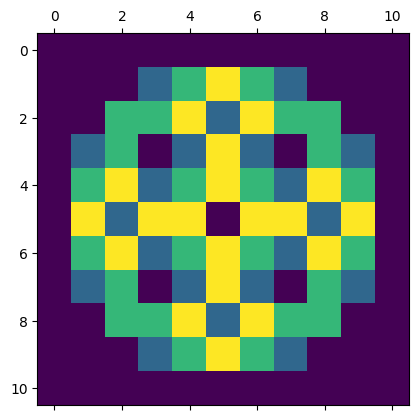

342

In [ ]:
arena(128)


A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

Aplicaciones de la regla:  7274878


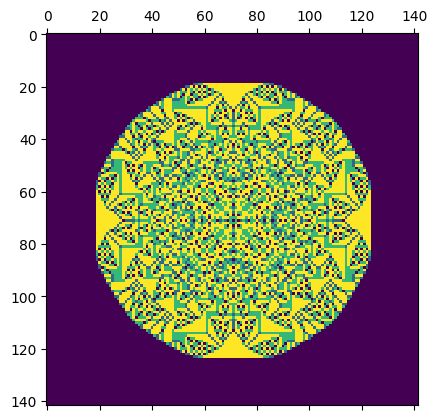

7274878

In [ ]:
arena(20000) # reemplace N por el valor máximo que alcanzó a procesar


## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería **mejor quitar de una sola vez lo más que se pueda**. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena **mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales**. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
def revisamatriz(mat,tamano):

  #i=0
  #j=0
  bandera=False #Iniciamos con condicion falsa
  for i in range(0,tamano):
      for j in range(0,tamano):
        if mat[i][j]>=4:
          bandera=True #Encuentra casilla con valor >=4 entonces detiene la busqueda y le dice a arena() que continue distribuyendo
          return bandera
  return bandera #No encuentra casilla con valor para seguir distribuyendo, por lo tanto termina la distribución

In [ ]:
def maximomultiplo4(num):
    #i=0
    for i in range(0,num+1): #Num +1 pues necesito considerar el valor real del numero de granos de la casilla
      if i%4==0:             #Si es multiplo de 4 lo guardo temporalmente
        multiplo= i
    return multiplo          #retornando así el mayor multiplo de 4 encontrado

assert maximomultiplo4(12)==12
assert maximomultiplo4(9)==8

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def arena2(N):
  # escriba su código aquí

  #Definimos el tamaño del tablero------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  if N<32: #Caso N<32
    if N%2==0:
      m=N-1 #si es par necesito sacarle 1 para tener matriz imparXimpar
    else:
      m=N
  else:    #Caso N>32 con area de circulo
    m=int(int(math.sqrt(N/math.pi))+(math.sqrt(N/math.pi)*0.8))
  mat = np.zeros((m,m))

  #Procesamos los granos de arena-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  #Ya que todas las celdas vacias de la matriz son representadas por valor 0, y necesitamos matrices de tamaño impar para tener un lugar central para los granos de arena
  #eso nos lleva a pensar que tomando división entera del tamaño de la matriz nos permite colocar la arena al medio (EJ: 5x5 tomamos 5//2 y nos coloca los granos de arena en [2][2] que sería el centro de esa matriz)
  mat[m//2][m//2]=N

  #Recorremos toda la matriz partiendo desde arriba, ie, [0][0]
  #i=0
  #j=0
  cont=0 #Para contar numero de veces que se aplica la regla

  while revisamatriz(mat,m): #modificada luego de feedback tarea #Funcion auxiliar que recorre la matriz y dice si hay valor 4 en alguna parte asi no cambie nada

    for i in range(0,m):
      for j in range(0,m):
        if mat[i][j]>=4:
          multiplo=maximomultiplo4(int(mat[i][j])) #necesite ponerle int() porque si no daba error np.float64 cuando igualmente le estoy pasando un valor entero...
          mat[i-1][j]+=multiplo/4 #Agrega la cantidad de granos arriba (de acuerdo al multiplo equitativamente)
          mat[i][j-1]+=multiplo/4 #Agrega la cantidad de granos izquierda
          mat[i+1][j]+=multiplo/4 #Agrega la cantidad de granos abajo
          mat[i][j+1]+=multiplo/4 #Agrega la cantidad de granos derecha

          mat[i][j]-=multiplo #le quitamos la cantidad de granos de arena (de acuerdo al multiplo)
          cont+=1


  print("Aplicaciones de la regla: ",cont) #printeamos numero de veces que se aplico la regla de distribución
  #Dibuja
  plt.matshow(mat)
  plt.show()
  return cont

Ahora ejecute la función para $N=128$:

Aplicaciones de la regla:  3031


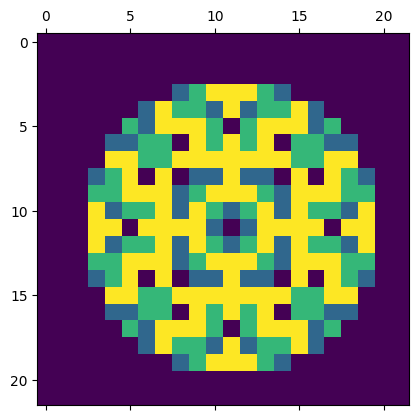

3031

In [ ]:
arena2(500)


A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

Aplicaciones de la regla:  4746155


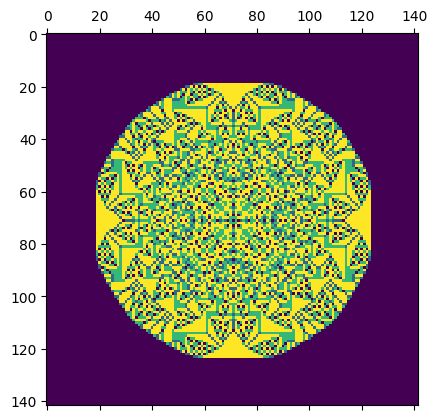

4746155

In [ ]:
arena2(20000) # reemplace N por el valor máximo que alcanzó a procesar

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

Aplicaciones de distribución arena según metodo arena(N)
88


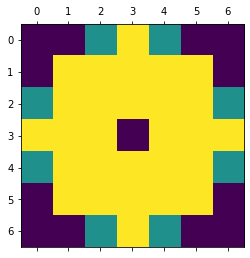

342


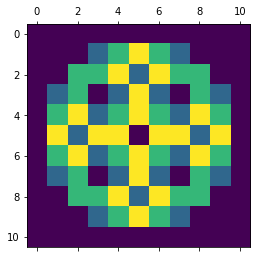

4702


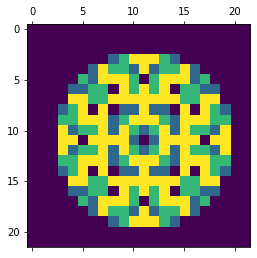

18226


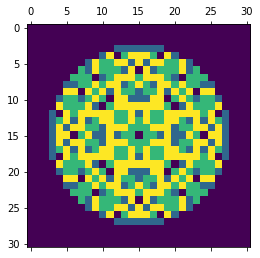

118003


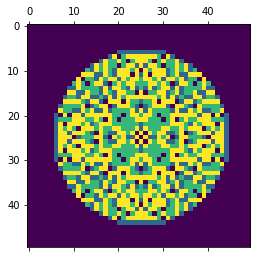

466188


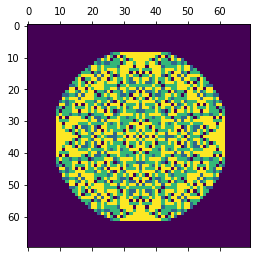

1830917


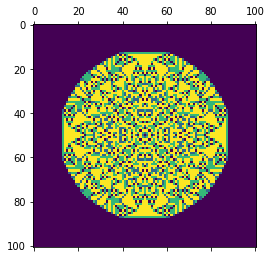

Aplicaciones de distribución arena según metodo arena2(N)
49


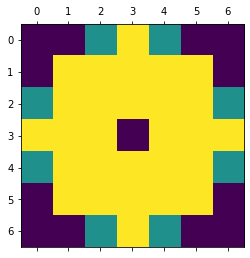

227


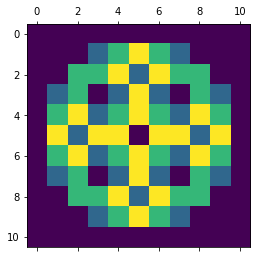

3031


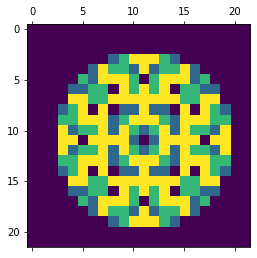

11724


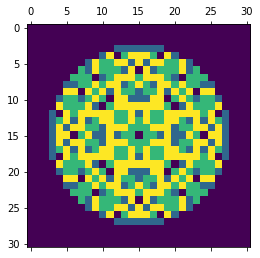

77719


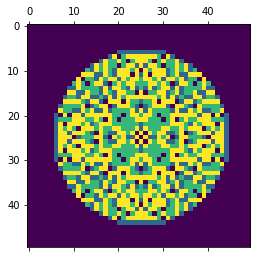

307656


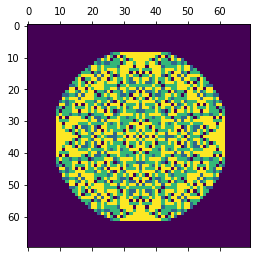

1196817


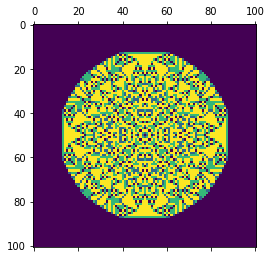

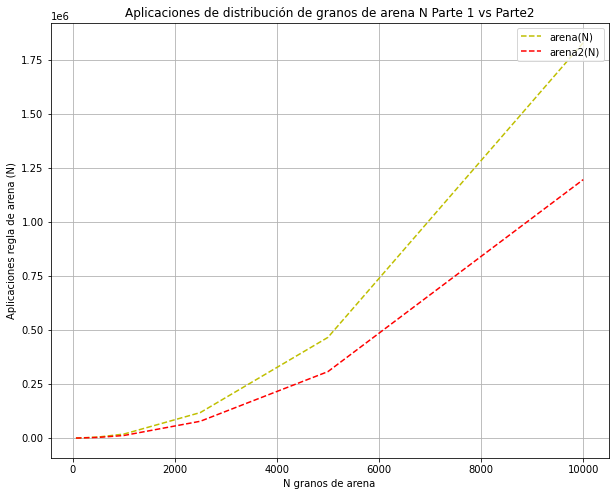

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([64,128,500,1000,2500,5000,10000]) #Arreglo que simboliza los granos N de arena

#Se guarda en un arreglo el contador de aplicaciones de la regla de acuerdo a arena(N)
print('Aplicaciones de distribución arena según metodo arena(N)')
y=np.array([arena(64),arena(128),arena(500),arena(1000),arena(2500),arena(5000),arena(10000)]) #De igual dimensión que X pues si no da error matplotlib

#Se guarda en un arreglo el contador de aplicaciones de la regla de acuerdo a arena2(N)
print('Aplicaciones de distribución arena según metodo arena2(N)')
y2=np.array([arena2(64),arena2(128),arena2(500),arena2(1000),arena2(2500),arena2(5000),arena2(10000)])

fig = plt.figure(figsize=(10,8))

#graficamos N en eje X y arena(N) eje Y
plt.title('Aplicaciones de distribución de granos de arena N Parte 1 vs Parte2')
plt.xlabel("N granos de arena")
plt.ylabel("Aplicaciones regla de arena (N)")
plt.plot(x,y,'y--')
plt.plot(x,y2,'r--')
plt.legend(('arena(N)','arena2(N)'), prop = {'size' : 10}, loc = 'upper right')
plt.grid()

plt.show()

Tabla comparativa de aplicaciones de la regla arena1() y arena2() respectivamente:

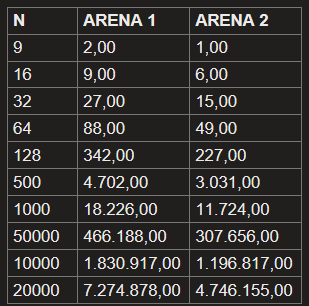

Cabe destacar que consulte con auxiliares si era posible adjuntar tabla de comparaciones hecha en excel, y me dijeron que sin ningún problema (La graficación si que está hecha en python)

Gracias a todo lo anterior, en efecto valio la pena la optimización pues acorta el numero de aplicaciones de la regla --> tiempo de ejecución. Una posible optimización que se me ocurre, es en vez de ir viendo casilla a casilla de la matriz, ir barriendo por columnas de forma de aplicar la regla en cada casilla de la columna 0, luego en cada casilla de la columna 1 y así sucesivamente, pasando si al menos 2 veces por todo el tablero ya que con 1 pasada no es suficiente, esto además se puede combinar con descontar por mayor multiplo de 4